In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl,np,pd,sklearn,tf,keras:
    print(model.__name__,model.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
matplotlib 3.0.2
numpy 1.16.1
pandas 0.23.4
sklearn 0.21.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# get the train_dataset and test_dataset
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
# split the train_dataset into train_set and valid_set ,to improve the believable the model evalute
x_train,x_valid = train_data[5000:],train_data[:5000]
y_train,y_valid = train_labels[5000:],train_labels[:5000]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(test_data.shape)
print(test_labels.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)
(10000, 28, 28)
(10000,)


In [4]:
input_shape = (28,28)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=input_shape))
# model.add(tf.keras.layers.Dense(units=300,activation="relu"))
# model.add(tf.keras.layers.Dense(units=100,activation="relu"))
# model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=300,activation="relu"),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=10,activation="softmax")
])

#relu: y = max(0,x)
#softmax: convert into the prob_dis vec,cs 221n

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [5]:
model.layers

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train,y_train,epochs=10,
         validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 58us/sample - loss: 2.3174 - accuracy: 0.6955 - val_loss: 0.8245 - val_accuracy: 0.6812
Epoch 2/10
55000/55000 [==============================] - 3s 62us/sample - loss: 0.6329 - accuracy: 0.7706 - val_loss: 0.6387 - val_accuracy: 0.7892
Epoch 3/10
55000/55000 [==============================] - 3s 63us/sample - loss: 0.5519 - accuracy: 0.7990 - val_loss: 0.5691 - val_accuracy: 0.8188
Epoch 4/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4905 - accuracy: 0.8242 - val_loss: 0.5180 - val_accuracy: 0.8324
Epoch 5/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4543 - accuracy: 0.8357 - val_loss: 0.5186 - val_accuracy: 0.8344
Epoch 6/10
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4286 - accuracy: 0.8442 - val_loss: 0.4990 - val_accuracy: 0.8354
Epoch 7/10
55000/55000 [==============================] -

In [8]:
type(history)

tensorflow.python.keras.callbacks.History

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

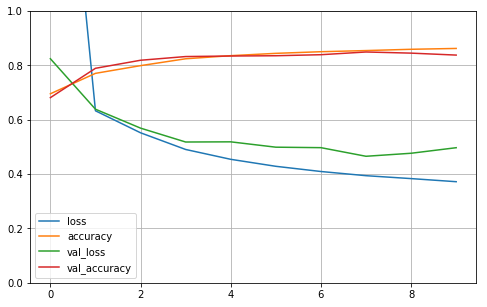

In [11]:
def plot_learning_curces(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curces(history)